![](https://neurohive.io/wp-content/uploads/2018/08/perseptron-mnogosloinyi.gif)

# Кошки против собак 

В этой домашке мы займёмся классической штукой. Попытаемся обучить нейросетку отличать кошек от собак. Если вы ещё не забыли лекцию, в $2013$ году это было непростой задачкой. Настолько, что [к соревнованию на Kaggle](https://www.kaggle.com/c/dogs-vs-cats) висит такое предысловие:

> В 1997 году Deep Blue обыграл в шахматы Каспарова.  В 2011 Watson обставил чемпионов Jeopardy. Сможет ли ваш алгоритм в 2013 году отличить Бобика от Пушистика?


Пойдём мы в наших исследованиях по довольно незатейливому маршруту: 

1. Попробуем обучить свою сетку и выжать из неё максимум
2. Попробуем посмотреть как именно работает наша сетка и что именно она видит
3. Попробуем взять чужую архитекрутру и сделать transfer learning 

В тетрадке можно заработать более __40__ баллов. Делайте только те задания, которые вам нравятся. 

In [1]:
import tensorflow as tf
tf.__version__ 

'2.0.0'

In [60]:
from tensorflow.keras import Sequential, Model
keras, L = tf.keras, tf.keras.layers

import numpy as np
import random
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

Подгрузим данные и посмотрим на них. Себе данные заберём из гуглового хранилища. Всё тот же волшебный `get_file` из Keras заботливо скачает их для нас и разложит по папочкам вот в такую структуру: 

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

In [3]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=url, extract=True)

# папка, где будет лежать архив с файлами
zip_dir

'/Users/fulyankin/.keras/datasets/cats_and_dogs_filterted.zip'

Разархивируем папку прямо из питона.

In [4]:
import zipfile

with zipfile.ZipFile(zip_dir, "r") as zip_ref:
    zip_ref.extractall("targetdir")

In [5]:
!ls /Users/fulyankin/.keras/datasets/cats_and_dogs_filtered/

train        validation   vectorize.py


## 1. Данные 

In [6]:
root_train = "/Users/fulyankin/.keras/datasets/cats_and_dogs_filtered/train/"
root_valid = "/Users/fulyankin/.keras/datasets/cats_and_dogs_filtered/validation/"

Подгрузим в оперативку всю валидационную выборку. Она не очень большая, поэтому мы можем позволить себе такую роскошь. Выделим $500$ наблюдений из валидации для теста. На нём мы будем проверять итоговую работоспособность модели. 

In [9]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_generator_valid = ImageDataGenerator(rescale=1/255)
image_valid = image_generator_valid.flow_from_directory(root_valid,  batch_size=1000)

Found 1000 images belonging to 2 classes.


In [10]:
for X, y in image_valid:
    print("Image batch shape: ", X.shape)
    print("Labe batch shape: ", y.shape)
    break

Image batch shape:  (1000, 256, 256, 3)
Labe batch shape:  (1000, 2)


In [11]:
np.mean(y)

0.5

In [12]:
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.5, stratify=y,
                                                random_state = 42)

__[2]__  Заведите для трэйна генератор. Установите любой размер батча, который мил вашему сердцу. Не забудьте при генерации сделать `rescale`. Нарисуйте несколько картинок из тренировочного батча.

In [ ]:
# тут будет код :3

## 2. Простая сетка 

__[2]__ Для начала реализуйте простую нейросеть:

* принимает на вход картинки
* вытягивает их в вектор
* пропускает через 2-3 полносвязных слоя
* на выходе предсказывает вероятность первого класса
* не забудьте про батчнорм и функции ативации

In [18]:
# тут будет код :3

__[2]__ Обучите модель. 

Вам нужно получить сеть, которая получит __accuracy__ на тестовых данных __не менее 55%__. При желании вы можете использовать различные колбэки вроде ранней остановки или тюнера скорости обучения.

In [84]:
# тут будет код :3

In [29]:
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(np.argmax(y_test, axis=1), model.predict_classes(X_test))

print("\n Test_acc =", test_acc)
assert test_acc > 0.55, " Мало! Переделывай."
print(" Сойдёт! Продолжаем работать.")


 Test_acc = 0.582
 Сойдёт! Продолжаем работать.


## 3. Свёрточная сетка

__[4]__ Реализуйте небольшую свёрточную сеть. Совсем небольшую. Обучите её также, как и предыдущую сеть. Если всё хорошо, у вас получится accuracy не меньше __60%__.

In [85]:
# тут будет код :3

In [31]:
test_acc = accuracy_score(np.argmax(y_test, axis=1), model.predict_classes(X_test))

print("\n Test_acc =", test_acc)
assert test_acc > 0.6, " Мало! Переделывай."
print(" Сойдёт! Продолжаем работать.")


 Test_acc = 0.618
 Сойдёт! Продолжаем работать.


## 4. Что видит наша нейронка

Модель готова. Давайте протестируем несколько разных способов визуализации её внутренностей. Будем делать это на примере конкретного изображения. Лучше всего, чтобы оно было с одним домашним любимцем. Он должен быть покрупнее. __Не надо делать задание, если вас оно не интересует.__ Баллов в этой тетрадке слишком много и на всех хватит. 

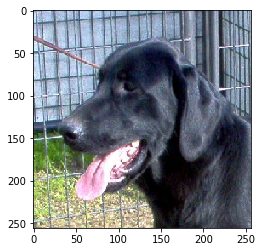

In [64]:
cur_img = X_test[12]
plt.imshow(cur_img);

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 10)      280       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256, 256, 10)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 10)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 163840)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               16384100  
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

In [66]:
len(model.layers)  # всего слоёв

7

### 4.1 Визуализируем карту фичей после каждого слоя

Сделаем довольно простую штуку. Вытащим карты фичей с каждого слоя и попробуем их визуализировать. Создадим модельку, которая будет выплёвывать для картинки все промежуточные результаты. 

In [67]:
# все выходы с разных слоёв
outputs = [layer.output for layer in model.layers]

# моделька
activation_model = Model([model.input], outputs)

In [73]:
# вернет массив с массивами под каждую активацию
activations = activation_model.predict(cur_img[np.newaxis,...])

# размеры всех активаций
[el.shape for el in activations]

[(1, 256, 256, 10),
 (1, 256, 256, 10),
 (1, 128, 128, 10),
 (1, 163840),
 (1, 100),
 (1, 100),
 (1, 2)]

In [74]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 256, 256, 10)


Это карта признаков 256*256 с 10 каналами. Посмотрим как выглядит эта карта. 

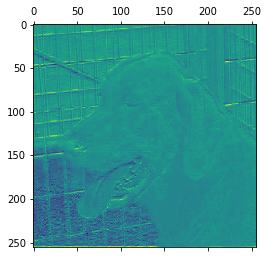

In [75]:
import matplotlib.pyplot as plt

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')
plt.show()

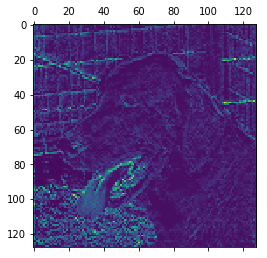

In [83]:
# посмотрим более глубокие каналы
first_layer_activation = activations[2]
plt.matshow(first_layer_activation[0, :, :, -1], cmap='viridis')
plt.show()

__[ещё 5]__ Получается, что наши свёртки пытаются нащупать контур собаки. Попробуйте визуализировать все свёртки, которые есть у вас в нейронке в виде большой картинки. Если в сетке мало свёрточных слоёв, увеличте их количество! 

In [ ]:
## Код, если вы скучаете

На картинках вы должны заметить следущие забавные закономерности: 

* Первый слой должен находить разные контуры, активация должна сохранять почти всю информацию из изображения 
* По мере подъема вверх по слоям, активация должна становиться более абстрактной, а визуальная интерпретация более сложной. Контуры вырисовываются всё чётче и мы понимаем что сетку видит кошачьи или собачьи уши и глаза. 
* Разряженность активаций должна возрастать с глубиной слоя. Всё больше и больше фильтров должны оставаться пустыми. 

### 4.2  Восходящий градиент 

Второй способ визуализации мы обсудили на паре, когда говорили про перенос стиля. Аккуратно, пошагово, реализуем его. 

__[2]__ Выбираем внутри сетки какой-то конкретный фильтр. Пишем модель, которая для картинки на входе, выплёвывает значения из этого фильтра на выходе.

In [ ]:
# тут будет код :3

__[2]__ Попробуем закинуть в нашу модель случайно сгенерированное изображение. Какие значения фильтра нейронка выплёвывает наружу?  

In [ ]:
# тут будет код :3

__[2]__ Хочется, чтобы средняя активация фильтра была максимально большой. Давайте возьмём эту активацию со знаком минус. Это наша функция потерь. Мы хотим закидывать в сетку такую картинку, которая возбудит фильтр сильнее всего, то есть минимизирует эти потери. 

Запишите функцию. Какие потери мы терпим на случайно сгенерированном примере? 

In [ ]:
# тут будет код :3

__[2]__ Теперь нам хотелось бы начать менять пиксели случайного изображения так, чтобы минимизировать придуманные в предыдущем пункте потери. Тогда мы сможем понять какие именно контуры в нашем изображении воздействуют на текущий фильтр активнее всего. 

Поместите наше случайное изображение в `Variable` и напишите функцию, которая будет делать по его пикселям один шаг градиентного спуска, минимизирующий потери. 

In [ ]:
# тут будет код :3

__[2]__ Делайте шаги, пока алгоритм не сойдётся. Постройте картинку с получившимся контуром, который улавливает выбранный вами фильтр. 

In [ ]:
# тут будет код :3

Попробуйте проделать ту же процедуру для других слоёв и фильтров. Только не надо заниматься копипастой кода, сразу же пишите удобные функции. 

In [ ]:
# тут будет код :3

__[ещё 10]__ Есть огромное количество других способов визуализировать работу свёрточной сетки. Например, можно [пытаться искать конкретные области картинки,](https://jacobgil.github.io/deeplearning/class-activation-maps) на которые смотрит нейронка. На этой идее основаны разные механизмы внимания, которые сегодня активно используются в сетках. Если есть желание, реализуйте этот механизм на котиках.

In [ ]:
# код по желанию 

## 5. Увеличиваем калибр 

__[unlimited]__  Теперь нам нужна модель, которая даст на тестовой выборке  __accuracy больше 70%.__ Если удастся, пробейте порог в __80%.__ Для этого возьмём предыдущую свёрточную сетку и будем постепенно её улучшать. Можно использовать абсолютно всё, что вы знаете: любые активации, слои, сколь угодно большие свёрточные слои и глубокие сети. Единственное, нельзя использовать предобученные сети и дополнительные данные. 

__Главное правило: одно изменение на эксперимент.__   Если у вас есть 2 идеи по улучшению сети, сначала попробуйте их независимо. Может оказаться, что одно из них дало __+10%__ точности а другое __-7%__. А вы так и будете думать, что сделали 2 полезных изменения которые в сумме дают __+3%__. Если какая-то идея не работает — даже если она вам нравится - опишите ее и выкидывайте из дальнейших экспериментов. 

* __Дропаут.__ может помочь обучеть нейросетку в несколько раз глубже и избежать переобучения. Это круто, но не стоит сразу ставить дропаут в $0.5$. Слишком сильный дропаут приводет к недообучению (underfitting).  Более того, дропаут замедляет обучение. Если пытаетесь пробовать его, начинайте с не очень больших значений.  
* __Аугментация данных.__ На паре мы обсуждали, что если котов и собак чуток повращать и погнуть, они всё ещё останутся таковыми, а модель получит новую пищу для размышления. Для того, чтобы проделать трюк с аугментацией, придётся немного подрихтовать генератор данных. Для тестовой выборки не надо ничего аугментировать. Это нечестно. Обратите внимание, что если вы сами не в состоянии понять что за картинка перед вами, то и сеть тоже это не поймёт. 
* __Прекратитеть стакать слои!__ Есть более эффективные идеи. Реализуйте на Keras свой ResNet слой или свой Inception слой. Придётся написать немного кода в функциональном стиле, но я верю в вас.  Ещё можете попробовать Densely-connected convolutions и многие другие идеи. Для вдохновения [можете сходить сюда.](https://habr.com/ru/company/ods/blog/343822/)  Не надо только копировать огромные архитектуры под чистую, вам точно хватит более маленькой сетки. 
* __Долго != плохо__. Более глубокие архитектуры обычно требуют бОльше эпох до сходимости. Это значит, что в первые несколько эпох они могут быть хуже менее глубоких аналогов. Дайте им время, запаситесь чаем и обмажьтесь batch-norm-ом.


__Все идеи поощряются баллами.__ Если вы реализуете свои слои, не удаляйте код с ними! Если вы делаете что-то банальное: добавили новую свёртку или новый Resnet слой, можете смело конспектировать результат и подчищать за собой код. Будте аккуратны, но в меру.  Если идеи кончились, [можно вдохновляться чужими решениями с kaggle.](https://www.kaggle.com/c/dogs-vs-cats) Если конечно они не очень упоротые. 

In [ ]:
# тут будет код :3

Опишите свои <s>ощущения</s> результаты от проведенных экспериментов. Может быть несколько проще, если писать этот отчет во время или сразу после каждого эксперимента.

__Результаты:__ 

In [ ]:
# тут будет код :3

## 6. Transfer learning 

__[5]__ Возьмите модель из зоопарка, который лежит в Tensorflow. Срежте у неё лишние слои и дообучите под новый датасет. Удалось ли вам за счёт экспериментов достичь такого же качества? 

In [ ]:
# тут будет код :3

Вопрос на миллион. Вспомним про пикчу от Майкрософт. Если у вас есть лучшая из ваших архитектур, и вам показывается 12 изображений, с какой вероятностью она сломает капчу? Сколько в среднем попыток должна сделать нейросетка, чтобы её сломать(вспоминаем про геометрчиеское распределение)?


![](https://martin-thoma.com/images/2011/09/ASIRRA.png)